In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast

In [18]:

# Leer y preparar los datos
df = pd.read_csv("./results_transformed.csv")
X = df["real_codification"].apply(ast.literal_eval).apply(pd.Series).to_numpy()
X = np.nan_to_num(X, nan=-1)  # Reemplazar NaN por -1
y = df["iou"].to_numpy()

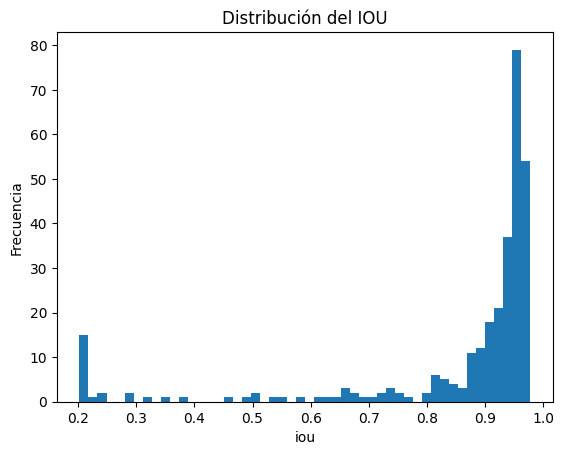

In [19]:
plt.hist(y, bins=50)
plt.title("Distribución del IOU")
plt.xlabel("iou")
plt.ylabel("Frecuencia")
plt.show()

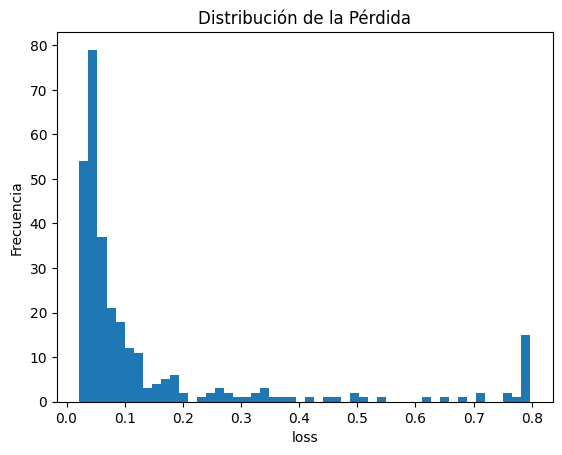

In [20]:
plt.hist(df["loss"], bins=50)
plt.title("Distribución de la Pérdida")
plt.xlabel("loss")
plt.ylabel("Frecuencia")
plt.show()

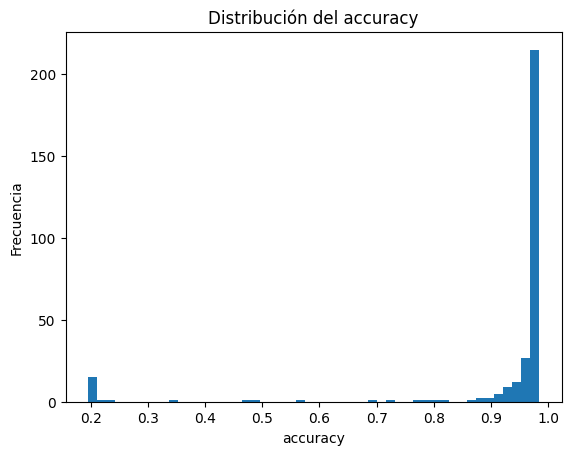

In [21]:
plt.hist(df["accuracy"], bins=50)
plt.title("Distribución del accuracy")
plt.xlabel("accuracy")
plt.ylabel("Frecuencia")
plt.show()

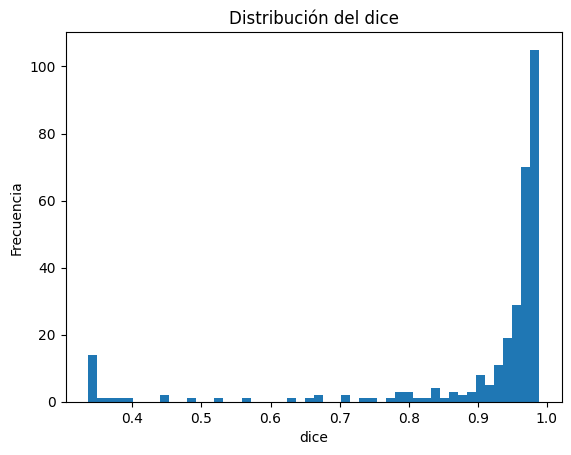

In [22]:
var = "dice"
plt.hist(df[var], bins=50)
plt.title(f"Distribución del {var}")
plt.xlabel(var)
plt.ylabel("Frecuencia")
plt.show()

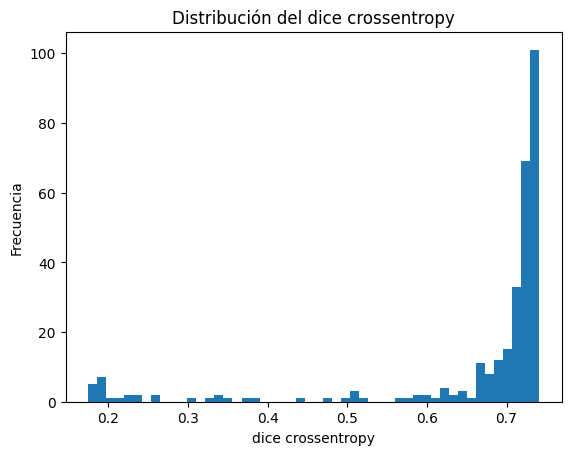

In [23]:
var = "dice crossentropy"
plt.hist(df[var], bins=50)
plt.title(f"Distribución del {var}")
plt.xlabel(var)
plt.ylabel("Frecuencia")
plt.show()

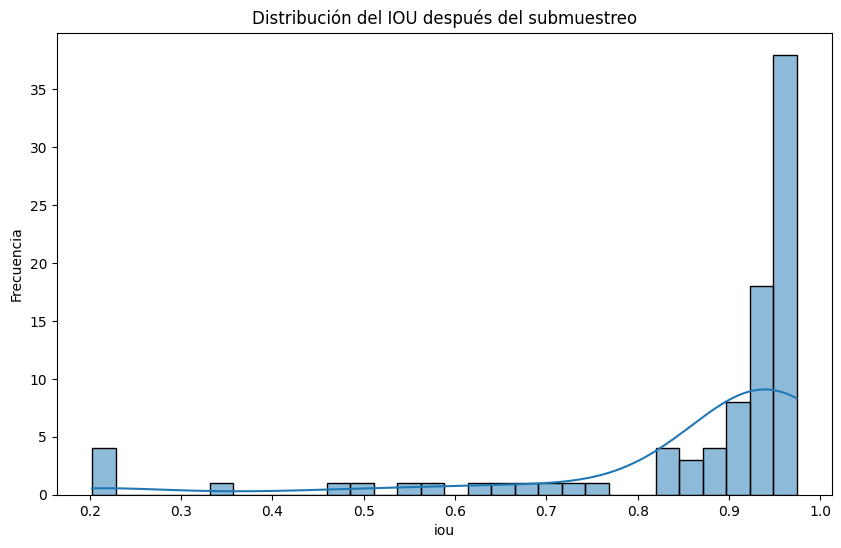

In [40]:
df = pd.read_csv("./results_transformed.csv")
df['iou'] = y

# 1. Binear los valores del target para detectar frecuencia
df['iou_bin'] = pd.qcut(df['iou'], q=10, duplicates='drop')  # o usa pd.cut

# 2. Contar frecuencia de cada bin
bin_counts = df['iou_bin'].value_counts().sort_index()

# 3. Establecer umbral de frecuencia (por ejemplo, más de 10% del total)
threshold = 0.03 * len(df)
bins_to_downsample = bin_counts[bin_counts > threshold].index

# 4. Submuestreo de los bins frecuentes
df_balanced = pd.DataFrame()
for b in df['iou_bin'].unique():
    bin_df = df[df['iou_bin'] == b]
    if b in bins_to_downsample:
        bin_df = bin_df.sample(frac=threshold / len(bin_df), random_state=42)  # downsampling
    df_balanced = pd.concat([df_balanced, bin_df])

# 5. Eliminamos la columna auxiliar
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle
X_balanced = df_balanced.drop(['iou', 'iou_bin'], axis=1).values
y_balanced = df_balanced['iou'].values

# 6. Mostrar la distribución de los bins después del submuestreo

plt.figure(figsize=(10, 6))
sns.histplot(df_balanced['iou'], bins=30, kde=True)
plt.title("Distribución del IOU después del submuestreo")
plt.xlabel("iou")
plt.ylabel("Frecuencia")
plt.show()
